## One Acre Data Analytics Excersie
### By Brian Kipkemboi
#### Date : 25 Septermber, 2025

## Importing All the necessary Libraries needed

<style>
.output {
    background-color: white !important;
    color: black !important;
}
</style

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [33]:
# Load the dataset
file_path = 'Data_Analyst_Test.xlsx'
data = pd.read_excel(file_path)

### EXPLORATORY DATA ANALYSIS

In [34]:
data.head()

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,Region,Agent ID,Loan Product Type,Loan Interest Rate,Repayment Frequency,Credit Score
0,abc0001,Completed,2022-05-20 08:23:51.406,2022-05-20 08:23:51.406,2022-05-20 08:23:51.406,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,1.000000,Mt Kenya,1770,Livestock; Poultry Brooding; 100 Chicks [Stock...,8.77,Weekly,455
1,abc0002,Active,2022-05-25 13:28:49.874,NaT,2022-08-31 18:34:01.654,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315,Lower Western,1770,Livestock; Poultry Brooding; 1000 Chicks [Stoc...,9.62,Monthly,772
2,abc0003,Active,2022-05-31 10:02:23.159,NaT,2022-07-22 01:17:15.527,3100.0,5273.52,6851.86,2000.0,1963-11-10,1,5072,Individual loan,0.769648,Upper Western,3616,Livestock; Poultry Brooding; 500 Chicks [Stock...,9.81,Monthly,571
3,abc0004,Active,2022-07-05 11:49:03.802,NaT,2022-08-18 13:34:13.983,4350.0,6142.35,10451.86,3000.0,NaT,1,5084,Individual loan,0.587680,Lower Western,2118,Individual Loan with SHS Sun King Vihiga,9.35,Weekly,301
4,abc0005,Active,2022-05-31 06:31:25.977,NaT,2022-07-04 13:30:36.437,3450.0,7743.68,10271.86,2500.0,1998-05-10,1,5074,Individual loan,0.753873,Lower Western,1281,Irrigation Kits rent to trial and own Micro fr...,14.37,Quarterly,810


In [35]:
# Checking the data types within the dataframe
#data.info()

### Cleaning the date columns 

In [36]:
data['start_date'] = pd.to_datetime(data['start_date']).dt.normalize()
data['end_date'] = pd.to_datetime(data['end_date']).dt.normalize()
data['next_contract_payment_due_date'] = pd.to_datetime(data['next_contract_payment_due_date']).dt.normalize()
data['birthdate'] = pd.to_datetime(data['birthdate']).dt.normalize()


In [37]:
# Confirming the date columns are clean and in correct format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   contract_reference               1000 non-null   object        
 1   status                           1000 non-null   object        
 2   start_date                       1000 non-null   datetime64[ns]
 3   end_date                         246 non-null    datetime64[ns]
 4   next_contract_payment_due_date   1000 non-null   datetime64[ns]
 5   cumulative_amount_paid           1000 non-null   float64       
 6   expected_cumulative_amount_paid  1000 non-null   float64       
 7   nominal_contract_value           1000 non-null   float64       
 8   deposit_amount                   1000 non-null   float64       
 9   birthdate                        858 non-null    datetime64[ns]
 10  gender                           1000 non-null   int64       

In [38]:
# How many records are there in our dataframe?
num_records, num_columns = data.shape

# Print the results in the desired format
print(f"We have {num_columns} columns and {num_records} records.")

We have 20 columns and 1000 records.


In [39]:
# Checking for missing / null values
missing_percentage = (data.isnull().sum() / len(data)) * 100

print(missing_percentage)

contract_reference                  0.0
status                              0.0
start_date                          0.0
end_date                           75.4
next_contract_payment_due_date      0.0
cumulative_amount_paid              0.0
expected_cumulative_amount_paid     0.0
nominal_contract_value              0.0
deposit_amount                      0.0
birthdate                          14.2
gender                              0.0
l3_entity_id                        0.0
name                                0.0
expected_payment_progression        0.0
Region                              0.0
Agent ID                            0.0
Loan Product Type                   0.0
Loan Interest Rate                  0.0
Repayment Frequency                 0.0
Credit Score                        0.0
dtype: float64


 - There are no significant null values from the dataset, we shall keep the dataframe as is.

## Task 1 

### Loan Performance and Risk Metrics

####  1. PAR Status based on repayment progression

In [40]:
# We get the current date to calculate PAR status
current_date = datetime.now()

In [41]:
def calculate_par_status(row):
    # Check if the loan status is 'Completed', these are categorized as on time records.
    if row['status'] == 'Completed':
        return 'On Time'
    
    # Calculate days past due based on the current date
    days_past_due = (current_date - row['next_contract_payment_due_date']).days
    
    # Determine the PAR status based on days past due
    if days_past_due < 0:
        return 'On Time'
    elif 0 <= days_past_due <= 7:
        return 'PAR0-7'
    elif 8 <= days_past_due <= 30:
        return 'PAR8-30'
    elif 31 <= days_past_due <= 90:
        return 'PAR31-90'
    else:
        return 'PAR90+'

# Apply the function to the DataFrame
data['PAR Status'] = data.apply(calculate_par_status, axis=1)


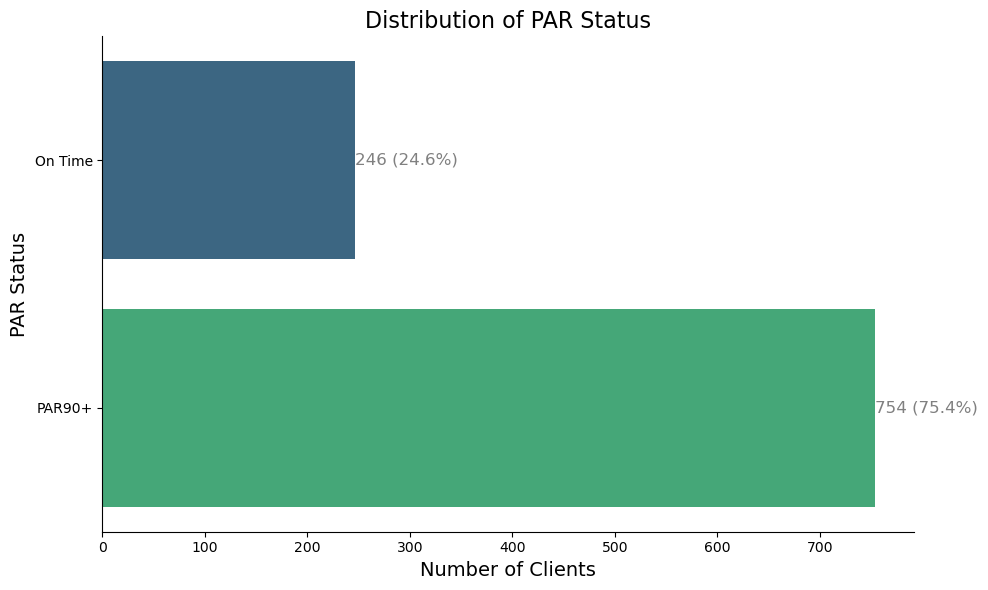

In [42]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Using horizontal bar plot
ax = sns.countplot(data=data, y='PAR Status', palette='viridis')

plt.title('Distribution of PAR Status', fontsize=16)
plt.xlabel('Number of Clients', fontsize=14)
plt.ylabel('PAR Status', fontsize=14)

# Calculating the total number of clients for percentage calculation
total_clients = len(data)

# Adding data labels as integers and percentages.
for p in ax.patches:
    count = int(p.get_width())  # Count 
    percentage = (count / total_clients) * 100  
    ax.annotate(f'{count} ({percentage:.1f}%)',  
                (p.get_width() + 0.2, p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=12, color='grey')  

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### 2. Current Collection Rate

The formula for the Current Collection Rate is given by:

$$
\text{Current Collection Rate} = \frac{\text{Expected Cumulative Amount Paid} - \text{Deposit Amount}}{\text{Cumulative Amount Paid}}
$$


In [43]:
data['Current Collection Rate'] = data['cumulative_amount_paid'] / (data['expected_cumulative_amount_paid'] - data['deposit_amount'])

#### 3. Total Amount in Arrears

Total Amount in arrears is given by:

$$ 
\text{Total Amount in Arrears} = \text{Expected Cumulative Amount Paid} - \text{Cumulative Amount Paid} 
$$

In [44]:
data['Total Amount in Arrears'] = data['expected_cumulative_amount_paid'] - data['cumulative_amount_paid']

#### 4. Payment Progression

The formula for Payment Progression is given by:

$$ 
\text{Payment Progression} = \frac{\text{Cumulative Amount Paid}}{\text{Nominal Contract Value}} 
$$



In [45]:
data['Payment Progression'] = data['cumulative_amount_paid'] / data['nominal_contract_value']

#### 5. Expected Payment Progression

The formula for Expected Payment Progression is given by:

$$ 
\text{Expected Payment Progression} = \frac{\text{Expected Cumulative Amount Paid}}{\text{Nominal Contract Value}} 
$$

In [46]:
data['Expected Payment Progression'] = data['expected_cumulative_amount_paid'] / data['nominal_contract_value']

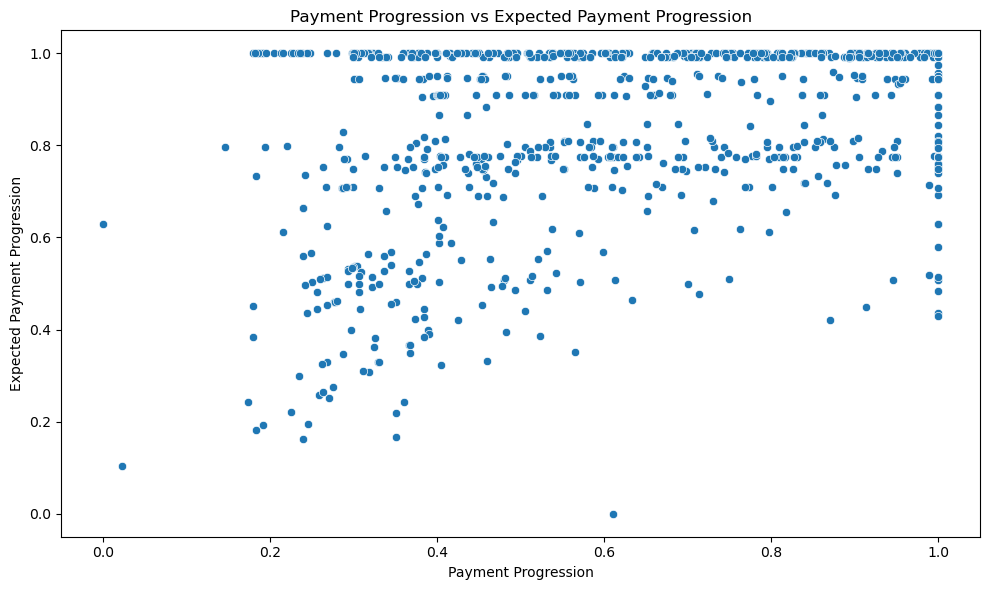

In [47]:
# Visualization: Payment Progression vs. Expected Payment Progression
plt.figure(figsize=(10,6))
sns.scatterplot(x='Payment Progression', y='Expected Payment Progression', data=data)
plt.title('Payment Progression vs Expected Payment Progression')
plt.xlabel('Payment Progression')
plt.ylabel('Expected Payment Progression')
plt.tight_layout()
plt.show()

#### 6. Loan Type Derivation

In [48]:
# Function to derive Loan Type
def derive_loan_type(name):
    if 'Individual' in name:
        return 'Individual Loan'
    elif 'Group' in name:
        return 'Group Loan'
    elif 'Paygo' in name:
        return 'Paygo Loan'
    elif 'Cash' in name:
        return 'Cash Sale'
    else:
        return 'Other'  # or return None if you want to leave it blank

# Apply the function to create a new column
data['Loan Type'] = data['name'].apply(derive_loan_type)

#### Confirming all the metrics are correct 

In [49]:
#data.head()
#ata.info()

## Task 2: Hidden Risk Analysis

####  - Flagging clients with high Payment Progression but low Expected Payment Progression

In [50]:
data['Hidden Risk Flag'] = np.where(
    (data['Payment Progression'] > 0.8) & 
    (data['Expected Payment Progression'] < 0.5) & 
    (data['status'] != 'Completed'), 
    'Flagged', 
    'Not Flagged'
)

#### - Flagging clients with a low Current Collection Rate (e.g., < 50%)

In [51]:
data['Collection Risk Flag'] = np.where(
    (data['Current Collection Rate'] < 0.5) & 
    (data['status'] != 'Completed'), 
    'Flagged', 
    'Not Flagged'
)

In [52]:
# Combining both flags to generate a summary of hidden risk clients
data['Hidden Risk'] = np.where((data['Hidden Risk Flag'] == 'Flagged') | (data['Collection Risk Flag'] == 'Flagged'), 'High Risk', 'Low Risk')

### Summary of hidden risk clients

In [53]:
hidden_risk_summary = data[data['Hidden Risk'] == 'High Risk']
hidden_risk_summary_count = hidden_risk_summary.groupby('Hidden Risk').size().reset_index(name='Count')

#### Visualizing the summary

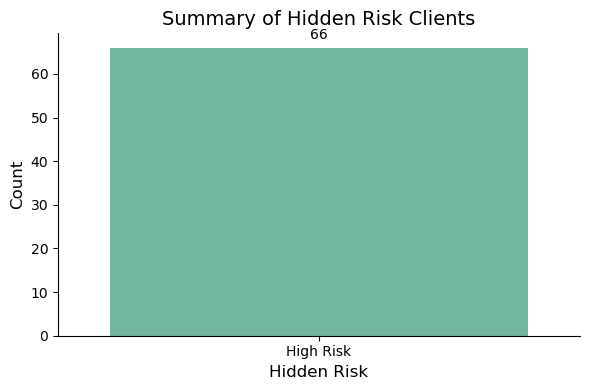

In [54]:
plt.figure(figsize=(6, 4))

# Create the barplot
barplot = sns.barplot(x='Hidden Risk', y='Count', data=hidden_risk_summary_count, palette='Set2')

# Set the title and labels
plt.title('Summary of Hidden Risk Clients', fontsize=14)
plt.xlabel('Hidden Risk', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points', 
                     fontsize=10)
barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Task 3: Identifying High Impact Agents

#### Calculating the total amount in arrears and total loan value per agent

In [55]:
agent_impact = data.groupby('Agent ID').agg(
    total_arrears=('Total Amount in Arrears', 'sum'),
    total_loan_value=('nominal_contract_value', 'sum')
).reset_index()

#### Calculating the Agent Impact Score And Identifying Top 5 Agents

In [56]:
agent_impact['Agent Impact Score'] = agent_impact['total_arrears'] / agent_impact['total_loan_value']

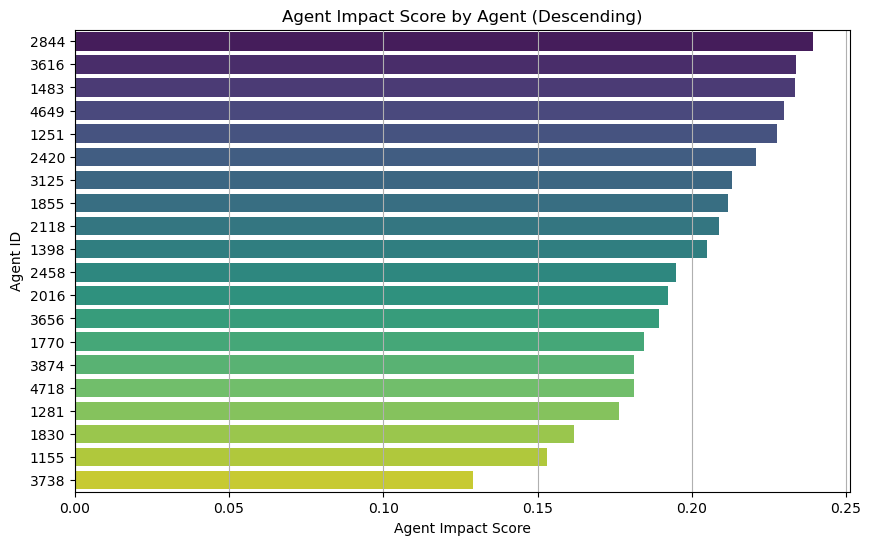

In [57]:
# Sort by 'Agent Impact Score' in descending order
agent_impact_sorted = agent_impact.sort_values(by='Agent Impact Score', ascending=False)

# Convert 'Agent ID' to a categorical type and set the order based on the sorted scores
agent_impact_sorted['Agent ID'] = pd.Categorical(agent_impact_sorted['Agent ID'], categories=agent_impact_sorted['Agent ID'], ordered=True)

# Set up the plot with horizontal bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Agent Impact Score', y='Agent ID', data=agent_impact_sorted, palette='viridis', orient='h')

# Add labels and title
plt.ylabel('Agent ID')
plt.xlabel('Agent Impact Score')
plt.title('Agent Impact Score by Agent (Descending)')
plt.grid(axis='x')

# Show plot
plt.show()

In [58]:
#### Identifying the top 5 high-impact agents
top_5_agents = agent_impact.nlargest(5, 'Agent Impact Score')
top_5_agents

,Agent ID,total_arrears,total_loan_value,Agent Impact Score
12,2844,120093.76,501977.18,0.239241
14,3616,102634.47,439268.35,0.233649
4,1483,109513.72,469034.16,0.233488
18,4649,116055.60,504534.11,0.230025
1,1251,111257.43,488711.00,0.227655


#### Distribution of Agent Impact Scores

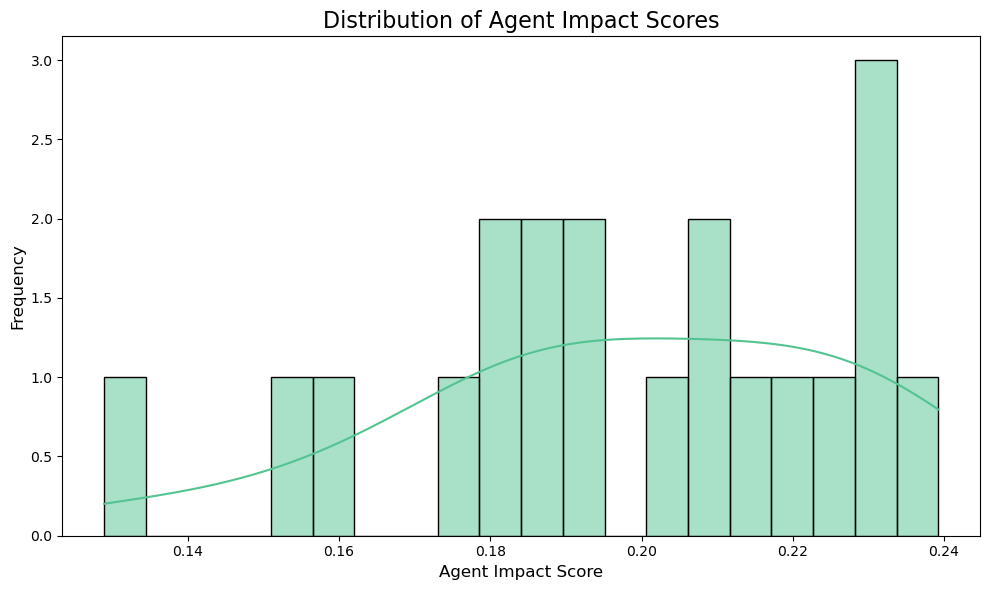

In [59]:
# Ignore the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
agent_impact['Agent Impact Score'].replace([np.inf, -np.inf], np.nan, inplace=True)
agent_impact_clean = agent_impact.dropna(subset=['Agent Impact Score'])

plt.figure(figsize=(10, 6))
# Create histogram bars
sns.histplot(agent_impact_clean['Agent Impact Score'], 
             bins=20, 
             color='#54C392',  
             kde=True)  

# Set titles and labels
plt.title('Distribution of Agent Impact Scores', fontsize=16)
plt.xlabel('Agent Impact Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Strategy for Rebalancing Portfolios at One Acre Fund

To ensure that no single agent has disproportionate influence, I recommend implementing a **diversification strategy** across the portfolios. This can be achieved by redistributing loans based on several key factors:

1. **Loan Size Caps**: Establish maximum loan limits per agent to prevent any single agent from controlling a large portion of the portfolio. This ensures a more equitable distribution of funds.

2. **Risk Assessment**: Conduct a thorough risk assessment for each agent based on their historical performance, repayment rates, and client demographics. Allocate loans according to their risk profiles, ensuring that high-risk agents receive proportionately smaller loans.

3. **Geographic Distribution**: Redistribute loans based on geographic regions, ensuring that agents in underrepresented areas receive adequate funding. This promotes balanced growth and minimizes the risk associated with concentration in specific areas.

4. **Performance-Based Adjustments**: Regularly review agent performance and adjust loan allocations accordingly. High-performing agents could receive slightly larger allocations, while underperformers are supported with smaller loans.

By adopting these strategies, One Acre Fund can foster a more balanced and sustainable lending environment.


In [60]:
# Saving the updated dataset and agent impact analysis
data.to_excel('Loan_Performance_Analysis_with_Hidden_Risks.xlsx', index=False)
agent_impact.to_excel('Agent_Impact_Scores.xlsx', index=False)

In [61]:
!jupyter nbconvert --to html Brian_Kipkemboi.ipynb

[NbConvertApp] Converting notebook Brian_Kipkemboi.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 644465 bytes to Brian_Kipkemboi.html
